# ANN-Classification 

## Importing the Libraries and the Data

In [40]:
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from keras.models import Sequential
from keras.layers import Dense, Input

from sklearn.metrics import confusion_matrix, accuracy_score

## Data Preprocessing

In [43]:
df = pd.read_csv('HIGGS_8K.csv',header=None)
df.head()
# as in previous methods we replace the problematic value
df.iloc[:, 17] = pd.to_numeric(df.iloc[:, 17], errors='coerce').fillna(0) 
print(f'Fixed value: {df.iloc[0, 17]} (type: {type(df.iloc[0, 17])})')

Fixed value: 0.0 (type: <class 'float'>)


In [45]:
print(df.shape)

(8001, 29)


In [47]:
classification=df.iloc[:,0]
low_level=df.iloc[:,1:22]
high_level=df.iloc[:,22:]

## Low Level

In [71]:
# we split the dataset
low_level_train, low_level_test, classification_train, classification_test = train_test_split(low_level, classification, test_size=0.20, random_state=42)

# Feature scaling
scaler = StandardScaler()
low_level_train_scaled = scaler.fit_transform(low_level_train)
low_level_test_scaled =scaler.transform(low_level_test)

#building the ann
ann = tf.keras.models.Sequential()
ann.add(Input(shape=(21,)))  # The low level has 20 columns 
ann.add(tf.keras.layers.Dense(12, activation='relu')) #first layer
ann.add(tf.keras.layers.Dense(8, activation='relu')) #second hidden layer 

ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid')) #output layer

# Training the ANN
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
ann.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_23 (Dense)                │ (None, 12)             │           264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 8)              │           104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 377 (1.47 KB)

 Trainable params: 377 (1.47 KB)

 Non-trainable params: 0 (0.00 B)

In [134]:
ann.fit(low_level_train_scaled, classification_train, batch_size=6, epochs=200)

Epoch 1/200
1067/1067 ━━━━━━━━━━━━━━━━━━━━ 0s 440us/step - accuracy: 0.6752 - loss: 0.5912
Epoch 2/200
1067/1067 ━━━━━━━━━━━━━━━━━━━━ 0s 428us/step - accuracy: 0.6746 - loss: 0.5848
Epoch 3/200
1067/1067 ━━━━━━━━━━━━━━━━━━━━ 0s 419us/step - accuracy: 0.6709 - loss: 0.5912
Epoch 4/200
1067/1067 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step - accuracy: 0.6923 - loss: 0.5786
Epoch 5/200
1067/1067 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step - accuracy: 0.6684 - loss: 0.5886
Epoch 6/200
1067/1067 ━━━━━━━━━━━━━━━━━━━━ 1s 514us/step - accuracy: 0.6749 - loss: 0.5844
Epoch 7/200
1067/1067 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step - accuracy: 0.6748 - loss: 0.5873
Epoch 8/200
1067/1067 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step - accuracy: 0.6756 - loss: 0.5902
Epoch 9/200
1067/1067 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step - accuracy: 0.6688 - loss: 0.5926
Epoch 10/200
1067/1067 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step - accuracy: 0.6688 - loss: 0.5912
Epoch 11/200
1067/1067 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step - accuracy: 0.6815 - loss: 0.58

In [136]:
# Predicting the test set results
classification_pred=ann.predict(low_level_test_scaled)
classification_pred=(classification_pred>0.5)

# Making the confusion matrix
conf_matr = confusion_matrix(classification_test, classification_pred)
print(f'Confusion matrix for the low level is: \n{conf_matr}')
accuracy_score(classification_test, classification_pred)
print(f'Accuracy score is: {accuracy_score(classification_test, classification_pred)}')

51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 443us/step
Confusion matrix for the low level is: 
[[332 439]
 [206 624]]
Accuracy score is: 0.5971267957526546


In [138]:
# Evaluate the model on test data
loss, accuracy = ann.evaluate(low_level_test_scaled, classification_test)
print(f'Test loss: {loss}')
print(f'Test accuracy: {accuracy}')

51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 732us/step - accuracy: 0.6055 - loss: 0.7030
Test loss: 0.7425959706306458
Test accuracy: 0.5971267819404602


In [140]:
 y_true = pd.factorize(classification_test)[0]

51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step


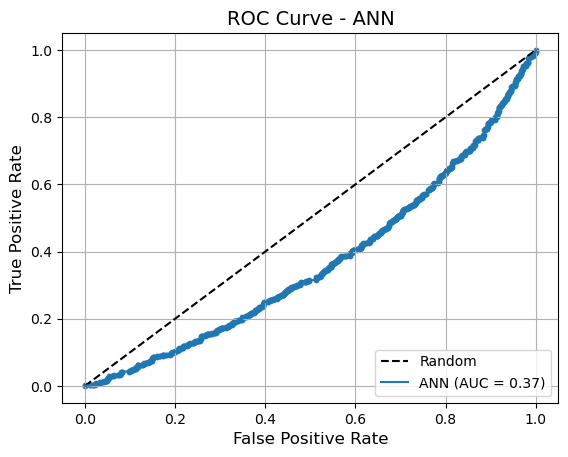

In [144]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt


y_pred_prob_ann = ann.predict(low_level_test_scaled)  # shape: (n_samples, 1)
fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob_ann)
auc_score = roc_auc_score(y_true, y_pred_prob_ann)

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.plot(fpr, tpr, label=f'ANN (AUC = {auc_score:.2f})')
plt.scatter(fpr, tpr, s=10)
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curve - ANN', fontsize=14)
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
